In [1]:
import requests
import pandas as pd
import sys
from pandas.io.json import json_normalize
from datetime import datetime
import gc
from google.oauth2 import credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from google.cloud import bigquery

In [2]:
# Set the scopes for the desired permissions
SCOPES = ['https://www.googleapis.com/auth/bigquery']

# Create the flow for authorization
flow = InstalledAppFlow.from_client_secrets_file(
    '...', scopes=SCOPES
)
credentials = flow.run_local_server(port=0)

project_id = '...'

# Use the obtained credentials for authentication
client = bigquery.Client(credentials=credentials, project=project_id) #

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=853561264369-cg46opisk56diiv2ee4nblkb6jmtland.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A59019%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=RVUZyeQykS7je0O1g47925dGK4XqXV&access_type=offline


In [3]:
client

In [3]:
# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("chicago_crime", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [5]:
# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

crime


In [6]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("crime")

# API request - fetch the table
table = client.get_table(table_ref)

In [7]:
# Print information on all the columns in the "crime" table in the "chicago_crime" dataset
table.schema

[SchemaField('unique_key', 'INTEGER', 'REQUIRED', None, None, (), None),
 SchemaField('case_number', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, None, (), None),
 SchemaField('block', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('iucr', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('primary_type', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('description', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('location_description', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('arrest', 'BOOLEAN', 'NULLABLE', None, None, (), None),
 SchemaField('domestic', 'BOOLEAN', 'NULLABLE', None, None, (), None),
 SchemaField('beat', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('district', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('ward', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('community_area', 'INTEGER', 'NULLABLE', None, None, (), None),
 

### In the context of BigQuery, field.field_type is used to access the data type of a column in the table schema.

When you retrieve the schema of a BigQuery table using table.schema, it returns a list of SchemaField objects. Each SchemaField object represents a column in the table and contains information about that column, such as its name, data type, mode (nullable or required), and more.

To access the data type of a column, you can use the field_type attribute of the SchemaField object. For example, field.field_type will give you the data type of a column represented by the field object.

In [8]:
# Count the number of TIMESTAMP columns
timestamp_columns = sum(field.field_type == 'TIMESTAMP' for field in table.schema)

# Print the count
print(f"Number of TIMESTAMP columns: {timestamp_columns}")

Number of TIMESTAMP columns: 2


### Exploring the data



In [12]:
# Preview the first five lines of the "crime" table
client.list_rows(table,max_results=5).to_dataframe()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,23995,JB303350,2018-06-12 08:41:00+00:00,000XX W 104TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,True,False,...,34,49,01A,1177863.0,1835679.0,2018,2023-03-28 05:00:19+00:00,41.704419,-87.624304,"(41.704419193, -87.624304349)"
1,3724,HM509037,2006-07-30 02:52:00+00:00,104XX S STATE ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,9,49,01A,1178106.0,1835436.0,2006,2022-08-31 04:51:30+00:00,41.703747,-87.623422,"(41.703746874, -87.623421862)"
2,26345,JE395709,2021-10-02 06:44:00+00:00,001XX E 107TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,9,49,01A,1178985.0,1834047.0,2021,2022-09-18 04:45:51+00:00,41.699915,-87.620245,"(41.699915337, -87.620245268)"
3,22962,HZ519714,2016-11-17 10:46:00+00:00,004XX E 107TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,9,49,01A,1181006.0,1834102.0,2016,2022-09-18 04:45:51+00:00,41.700020,-87.612844,"(41.700020108, -87.612843569)"
4,1933,HH849690,2002-12-20 06:00:00+00:00,007XX E 104TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,9,50,01A,1182896.0,1836154.0,2002,2022-09-18 04:45:51+00:00,41.705607,-87.605860,"(41.705607465, -87.60585975)"


In [ ]:
!pip install google-cloud-bigquery

In [13]:
fields_for_plotting = ['x_coordinate','y_coordinate']

In [14]:
data = client.list_rows(table,max_results=5).to_dataframe()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_key            5 non-null      Int64              
 1   case_number           5 non-null      object             
 2   date                  5 non-null      datetime64[ns, UTC]
 3   block                 5 non-null      object             
 4   iucr                  5 non-null      object             
 5   primary_type          5 non-null      object             
 6   description           5 non-null      object             
 7   location_description  5 non-null      object             
 8   arrest                5 non-null      boolean            
 9   domestic              5 non-null      boolean            
 10  beat                  5 non-null      Int64              
 11  district              5 non-null      Int64              
 12  ward        

In [18]:
corr_= data.corr()

C:\Users\apmle\AppData\Local\Temp\ipykernel_31656\306902632.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_= data.corr()


In [17]:
import seaborn as sns
%matplotlib inline

<Axes: >

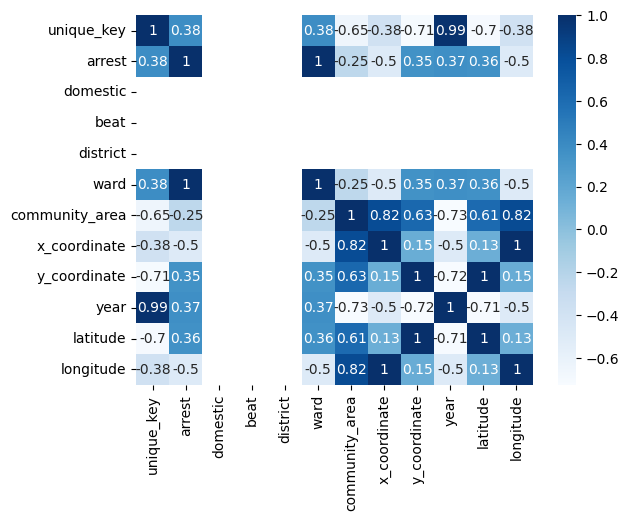

In [20]:
# plot the heatmap
sns.heatmap(corr_, cmap="Blues", annot=True)